# Learning Objectives Module 1 : Intro to Tides

I. What causes tides?

II. How does the moon impact tides?

III. How do the Sun and Moon work together to influence tides?

IV. What are Neap and Spring tides?

## What causes tides?

Tides are caused by gravitational attraction to nearby celestial bodies.  The water on Earth is affected mainly by the Moon, because it is so close, and the Sun, because it is so massive.

In [1]:
# Before we can get started, we are going to import some python packages that will be needed to run this notebook.
import os
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
from IPython.display import Image, display
from tydal import module1_utils
from tydal import MoonCycleDates as mcd


from datetime import date
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as IM
import matplotlib._png
from matplotlib._png import read_png

### The Moon's contribution to tides
First, we will look at the influence of the Moon on Earth's water.  The easiest way to explain this is to imagine the Earth being covered completely by ocean.  This allows the water to flow without running into any continents, which complicates the resulting tides.
The primary bulge on the surface of the Earth facing the Moon is intuitive;  The Moon is on that side and its gravity pulls the water toward it.  The secondary bulge on the opposite face of the Earth is more elusive.  The center of mass of the Earth-Moon system is located inside the Earth, but slightly closer to the Moon.  As the Earth-Moon system rotates around this center of mass, the centripetal force pushes water to the outside, which is the side opposite the Moon.  The tidal bulge can be seen in blue below.  The Earth is the green circle and the Moon is the grey circle.

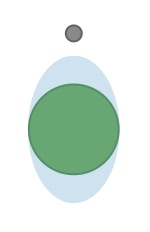

In [3]:
Image("./Figures/TidalBulge.jpg")

The moon revolves around the Earth as the Earth rotates around its axis.  The period of Earth's rotation is 24 hours, while the period of the Moon's revolution around the Earth is ~28 days.  As the Earth rotates underneath the Moon, it moves through the Moon's tidal bulge.  This can be seen in the figure below.  A single point on Earth has been highlighted as a red dot.  Initially, the red dot starts out at the crest of the tidal bulge and is experiencing high tide.  After 6 hours, the red dot has moved underneath the bulge and has moved to the trough of the bulge known as low tide.  Continuing through the day, the red dot experiences another crest (high tide) and another trough (low tide) before returning to the initial position at high tide.  

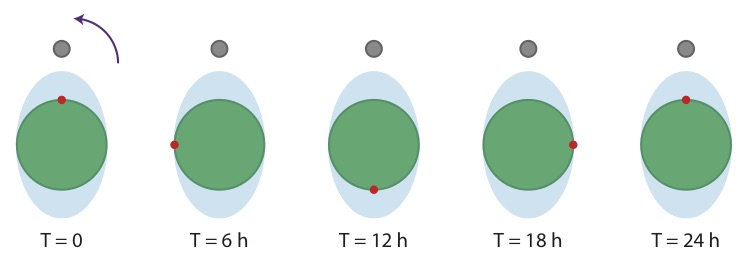

In [4]:
Image ("./Figures/Earth_Moon_Tides_Simple.jpg")

A location on Earth where there are two high tides and two low tides with equal amplitude experiences semidiurnal tides.  This can be seen by plotting some tide data from North Carolina (below).

In [5]:
%matplotlib inline

# Lets load in some tide data

NCdata = pd.read_csv("./Data/SemiDiurnalTides.csv", parse_dates=["Date Time"])

# And let's look at what data we have
NCdata.head()

,Date Time,Water Level,Sigma
0,2016-03-07 18:00:00,0.123,0.659
1,2016-03-07 18:06:00,0.169,0.692
2,2016-03-07 18:12:00,0.241,0.689
3,2016-03-07 18:18:00,0.278,0.682
4,2016-03-07 18:24:00,0.386,0.738


In [6]:
NCdata.tail()

,Date Time,Water Level,Sigma
256,2016-03-08 19:36:00,-0.024,0.243
257,2016-03-08 19:42:00,0.120,0.230
258,2016-03-08 19:48:00,0.218,0.279
259,2016-03-08 19:54:00,0.294,0.246
260,2016-03-08 20:00:00,0.428,0.292


In [7]:
NCdata.columns

Index(['Date Time', 'Water Level', 'Sigma'], dtype='object')

As you can see from the top of this data, we have three columns.  These columns hold data for the time that the water level measurement was taken, the measured water level, and Sigma, representing the uncertainty in the measurement.  Now that we know what makes up our data, let's plot it.

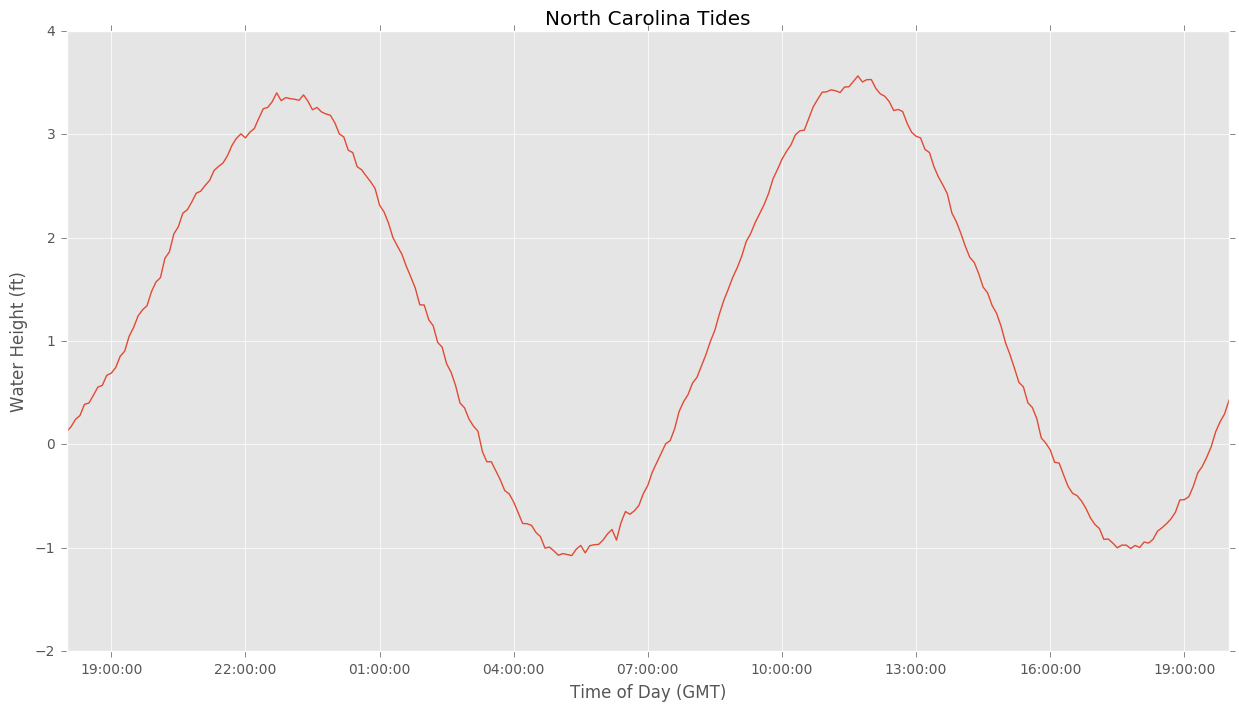

In [8]:
# This ploting function takes in five arguments: 
# a dataset, a start time, an end time, a title, and a size
module1_utils.tidal_plot(NCdata, "2016-03-07 18:00:00", "2016-03-08 20:00:00",
                         title="North Carolina Tides", sized=(15,8))

As you can see, there are two low tides and two high tides of equal amplitude.

Let's slice the data to see just one cycle: from 1 ft elevation, to high tide, to low tide, back to 1 ft elevation.  That looks like that starts just after 19:00:00 and ends around 08:30.  Let's trim the data to reflect this and plot it again.

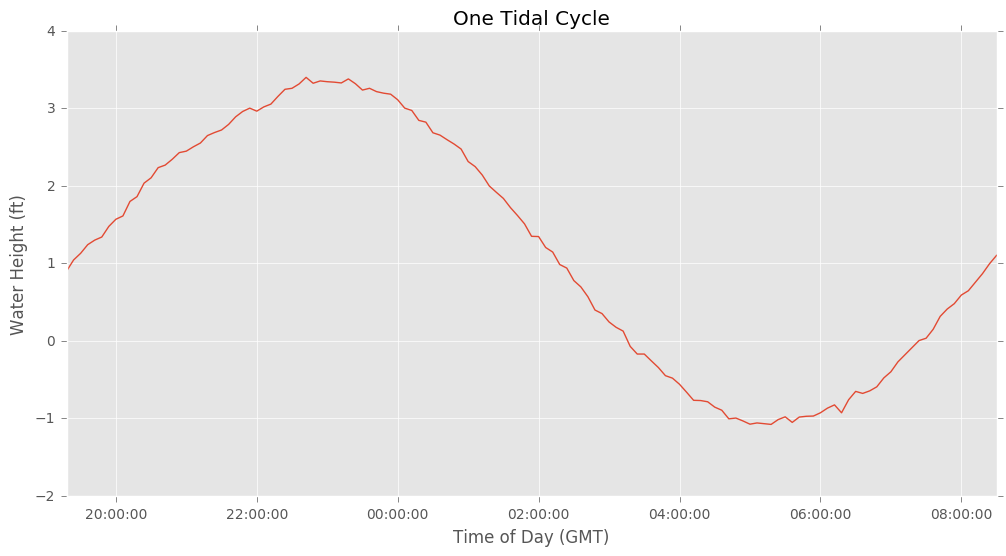

In [9]:
# This is the same function as above
module1_utils.tidal_plot(NCdata, "2016-03-07 19:16:00", "2016-03-08 08:30:00",
                         title="One Tidal Cycle", sized=(12,6))

The tidal period, however is not exactly 24 hours.  The Moon revolves around the Earth in the same direction that the Earth rotates around its axis.  As such, after 24 hours the Moon has advanced past its original position.  To make up for the progress of the Moon, the Earth has to rotate for an additional 50 minutes to be positioned underneath the moon.  The correct representation is shown below.

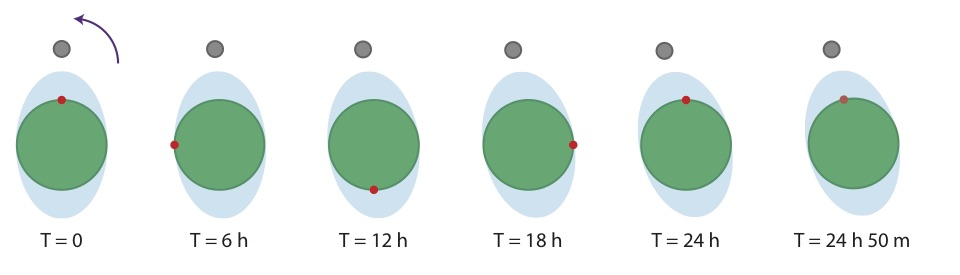

In [10]:
Image("./Figures/Earth_Moon_Tides_Real.jpg")

### The Sun's contribution to tides

The Sun, although much more massive than the Moon, is farther away from Earth than the Moon and has less of an effect on the Earth's tides than the Moon.  However, it still creates its own tidal bulge.  The bulge from the sun is similar to the one formed by the moon.  Thus, the resulting bulge that the Earth sees is a sum of the two bulges: the one from the Moon and the one from the Sun.  The tidal bulge due to the Sun is in yellow and the tidal bulge from the Moon is in blue.

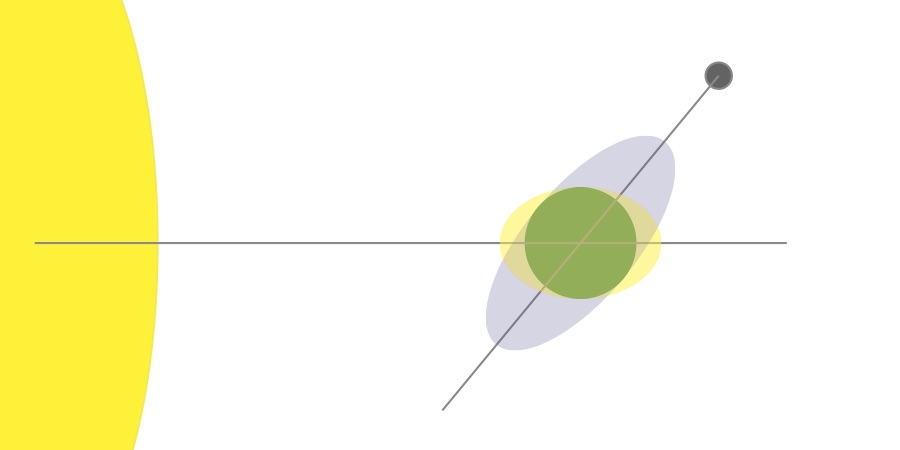

In [11]:
Image("./Figures/SunMoon_sum.jpg")

#### Phases of the Moon

First, we will review the phases of the Moon.  The amount of the moon that is visible (illuminated) from Earth is dependent on its position relative to the Earth and Sun. When the Moon is positioned between the Sun and the Earth, it is called a New Moon, as shown below.  If you look at the moon you will not see it because the illuminated side is facing away from us.

The dates corresponding to each phase of the moon for 2014 are included in a list and are displayed below each image.

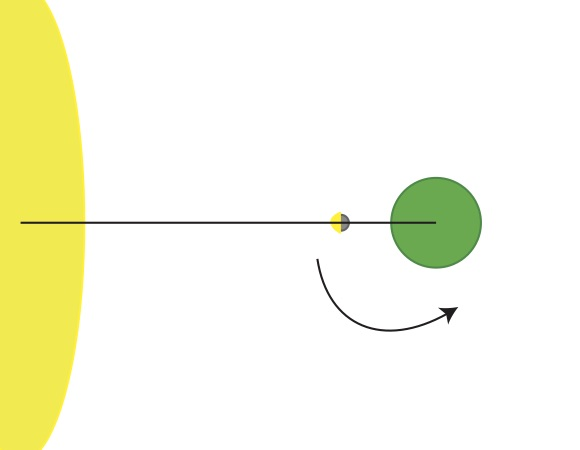

In [12]:
Image("./Figures/NewMoon.jpg")

In [13]:
mcd.New_2014

['20140101',
 '20140130',
 '20140301',
 '20140330',
 '20140428',
 '20140528',
 '20140627',
 '20140726',
 '20140825',
 '20140923',
 '20141023',
 '20141122',
 '20141221']

When the Moon makes it a quarter of the way around the Earth, or 90 degrees, it has reached the phase known as First Quarter.  At the point the right half of the moon is illuminated when viewed from Earth, as seen below.

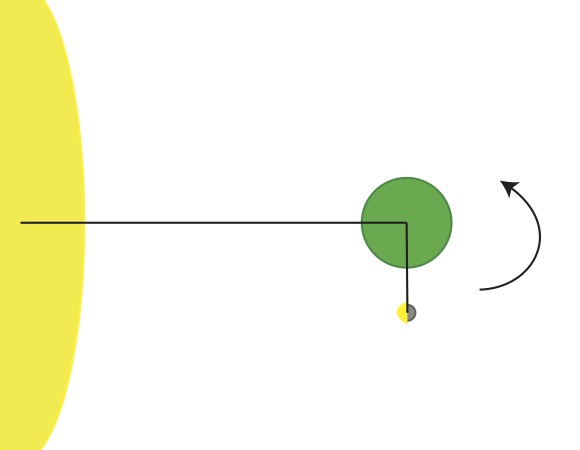

In [14]:
Image("./Figures/FirstQuarter.jpg")

In [15]:
mcd.First_2014

['20140107',
 '20140206',
 '20140308',
 '20140407',
 '20140506',
 '20140605',
 '20140705',
 '20140803',
 '20140902',
 '20141001',
 '20141030',
 '20141129',
 '20141228']

When the Moon has moved another quarter of the way around Earth, it reaches the phase known as Full Moon.  When viewed from the Earth, the whole moon is illuminated and visible.  

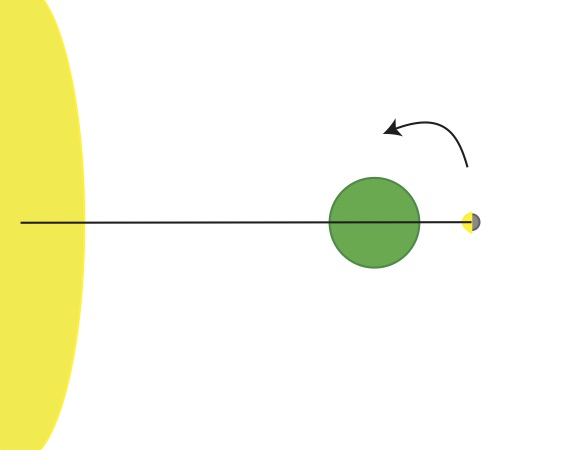

In [16]:
Image("./Figures/FullMoon.jpg")

In [17]:
mcd.Full_2014

['20140115',
 '20140214',
 '20140316',
 '20140415',
 '20140514',
 '20140612',
 '20140712',
 '20140810',
 '20140908',
 '20141008',
 '20141106',
 '20141206']

Continuing through another quarter of the way around Earth puts it in the Third Quarter postion.  At this point, the left half of the Moon is illuminated when viewed from Earth.

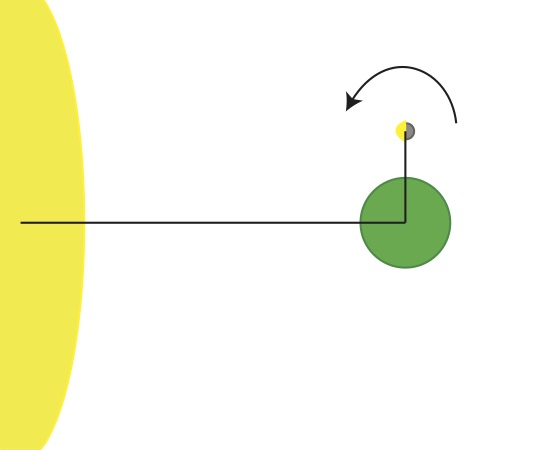

In [18]:
Image("./Figures/ThirdQuarter.jpg")

In [19]:
mcd.Third_2014

['20140123',
 '20140222',
 '20140323',
 '20140422',
 '20140521',
 '20140619',
 '20140718',
 '20140817',
 '20140915',
 '20141015',
 '20141114',
 '20141214']

To see this monthly effect, let's plot a month of data.  We have a new data set for this demonstration, so we will load that in first and then parse out a month period.

In [2]:
[NB, PT, PA] = module1_utils.load_tide_station_data()

# Just to clarify, we are loading the data for three tidal stations at once here.
# They are Neah Bay (NB), Port Townsend, (PT), and Port Angeles (PA).
# We will only explore the Neah Bay in this section, but will use the other
# stations later.

This data is similar in form to the data used above.  We can check that by displaying the head and tail of the data.

In [21]:
NB.head()

,Date Time,Water Level,Sigma
0,2014-01-01 00:00:00,0.026,0.049
1,2014-01-01 00:06:00,-0.197,0.043
2,2014-01-01 00:12:00,-0.427,0.033
3,2014-01-01 00:18:00,-0.624,0.043
4,2014-01-01 00:24:00,-0.788,0.049


In [22]:
NB.tail()

,Date Time,Water Level,Sigma
79901,2016-11-29 22:06:00,6.768,0.082
79902,2016-11-29 22:12:00,6.594,0.075
79903,2016-11-29 22:18:00,6.453,0.072
79904,2016-11-29 22:24:00,6.329,0.069
79905,2016-11-29 22:30:00,6.165,0.069


Let's plot the full cycle from Full Moon to Full Moon using the lists above.  This will allow us to see how the position of the Moon relative to the Earth and Sun can affect the strength of the tides.

I'll plot November 1st to December 10th.  During this range there is a Full Moon (11/6), a Third Quarter Moon (11/14), a New Moon (11/22), a First Quarter Moon (11/29), and back to a Full Moon (12/6).

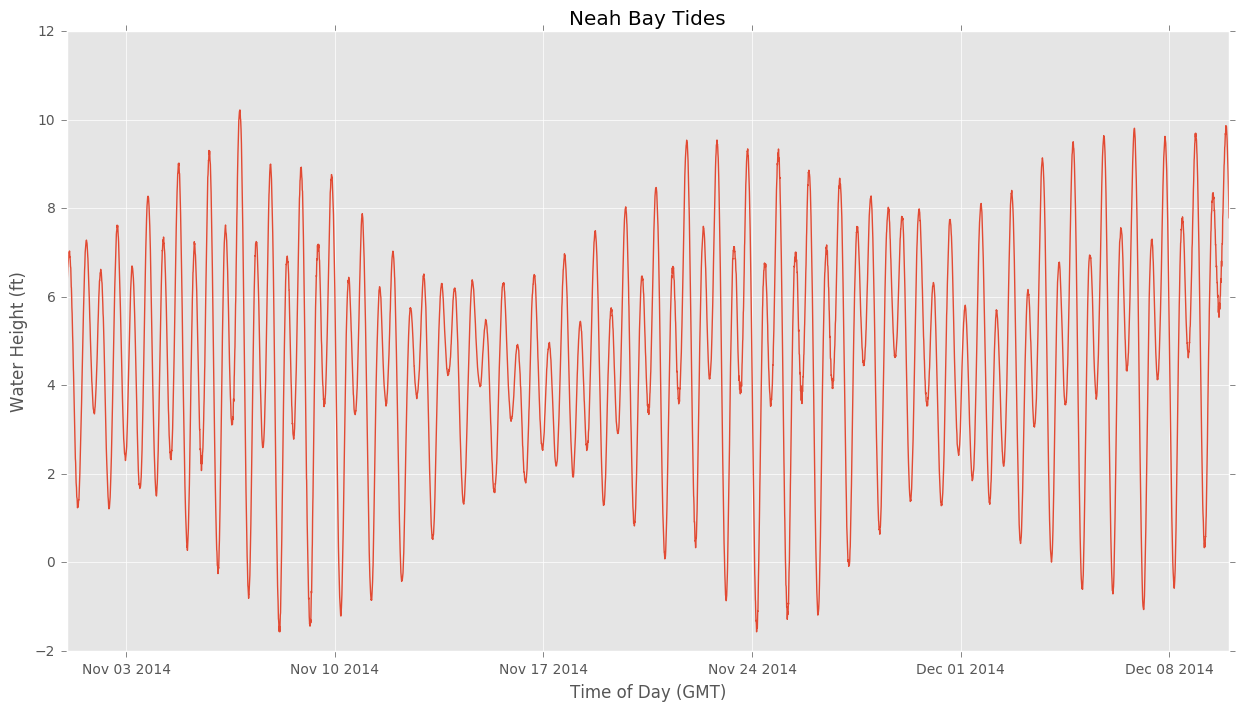

In [23]:
module1_utils.tidal_plot(NB, "2014-11-01 00:00:00", "2014-12-10 00:00:00",
                         title="Neah Bay Tides", sized=(15,8))

Notice how the tides change based on the phase of the moon.  The tidal range, the distance between the high tide and the low tide, is at a maximum during a New Moon or Full Moon and at a minimum during a First or Third Quarter Moon.

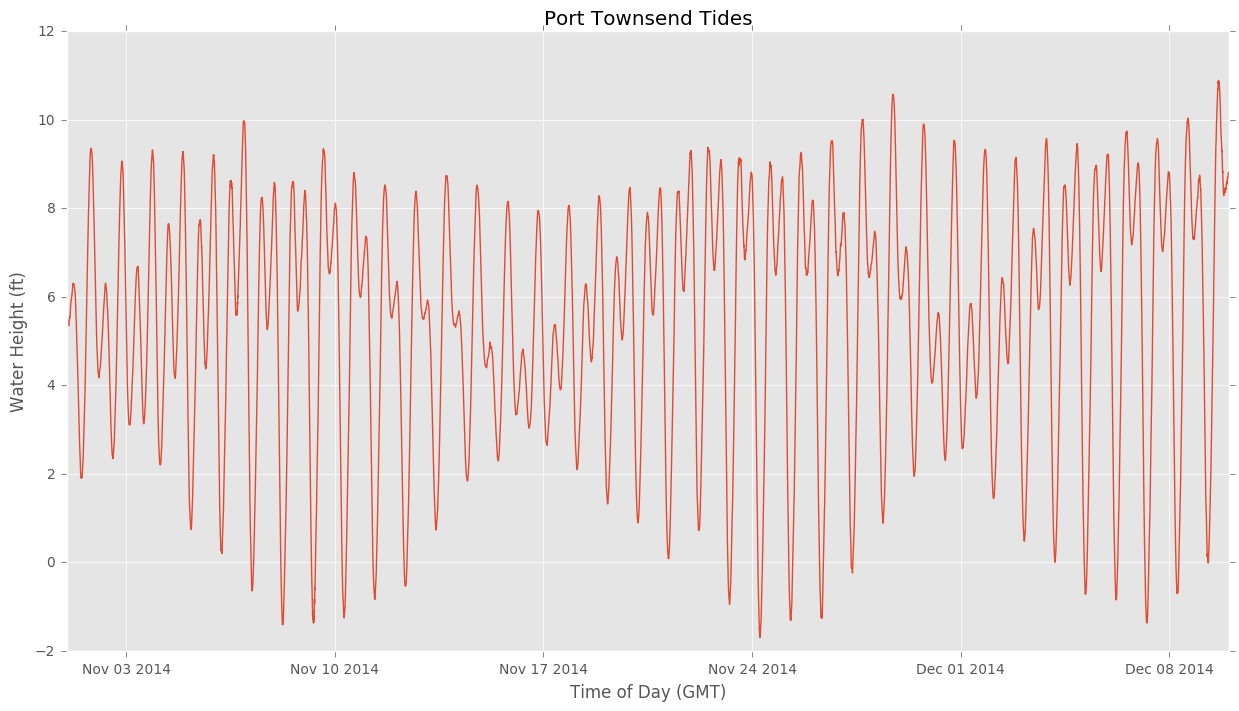

In [24]:
module1_utils.tidal_plot(PT, "2014-11-01 00:00:00", "2014-12-10 00:00:00",
                         title="Port Townsend Tides", sized=(15,8))

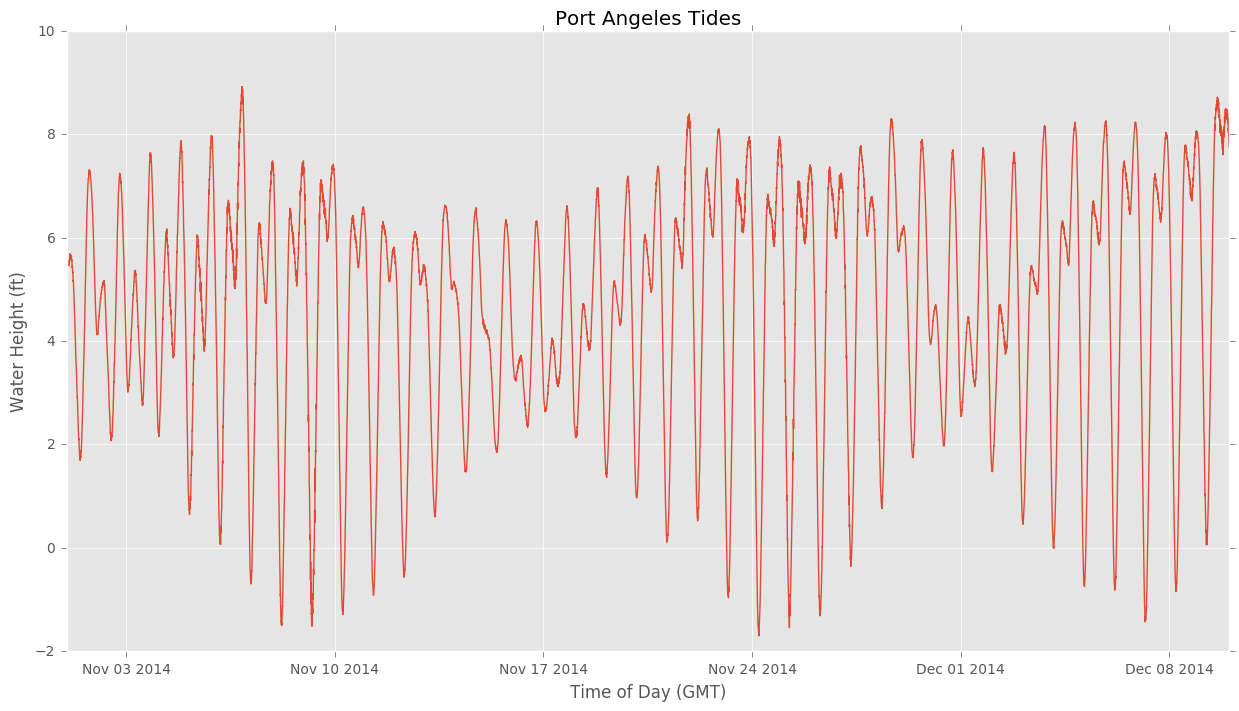

In [25]:
module1_utils.tidal_plot(PA, "2014-11-01 00:00:00", "2014-12-10 00:00:00",
                         title="Port Angeles Tides", sized=(15,8))

In [3]:
NB_2014 = module1_utils.trim_data(NB, "2014-01-01 00:00:00", "2014-12-31 23:54:00")
PT_2014 = module1_utils.trim_data(PT, "2014-01-01 00:00:00", "2014-12-31 23:54:00")
PA_2014 = module1_utils.trim_data(PA, "2014-01-01 00:00:00", "2014-12-31 23:54:00")
NB_2014.head()

,Date Time,Water Level,Sigma
Date Time,,,
2014-01-01 00:00:00,2014-01-01 00:00:00,0.026,0.049
2014-01-01 00:06:00,2014-01-01 00:06:00,-0.197,0.043
2014-01-01 00:12:00,2014-01-01 00:12:00,-0.427,0.033
2014-01-01 00:18:00,2014-01-01 00:18:00,-0.624,0.043
2014-01-01 00:24:00,2014-01-01 00:24:00,-0.788,0.049


In [27]:
NB_2014.tail()

,Date Time,Water Level,Sigma
Date Time,,,
2014-12-31 23:30:00,2014-12-31 23:30:00,-0.354,0.016
2014-12-31 23:36:00,2014-12-31 23:36:00,-0.381,0.010
2014-12-31 23:42:00,2014-12-31 23:42:00,-0.361,0.013
2014-12-31 23:48:00,2014-12-31 23:48:00,-0.332,0.013
2014-12-31 23:54:00,2014-12-31 23:54:00,-0.325,0.013


In [4]:
import datetime as dt
def mcddatetime(Moon):
    """Makes Moon Cycle date into datetime format for plotting"""
    dates = [(dt.datetime.strptime(date, '%Y%m%d').date() + pd.DateOffset(hours=0)) for date in Moon]
    modified_data=pd.to_datetime(dates)
    return modified_data


#mcd.New_2014
#mcd.New_2014_dates = [(dt.datetime.strptime(date, '%Y%m%d').date() + pd.DateOffset(hours=0)) for date in mcd.New_2014]
#pd.to_datetime(mcd.New_2014_dates)

In [5]:
New_2014_dates = mcddatetime(mcd.New_2014)
First_2014_dates = mcddatetime(mcd.First_2014)
Full_2014_dates = mcddatetime(mcd.Full_2014)
Third_2014_dates = mcddatetime(mcd.Third_2014)

In [10]:
subset = module1_utils.trim_data(NB, "2014-11-01 00:00:00", "2014-12-10 00:00:00")

In [7]:
FullMoon = plt.imread("./Figures/FullMoonA.png")

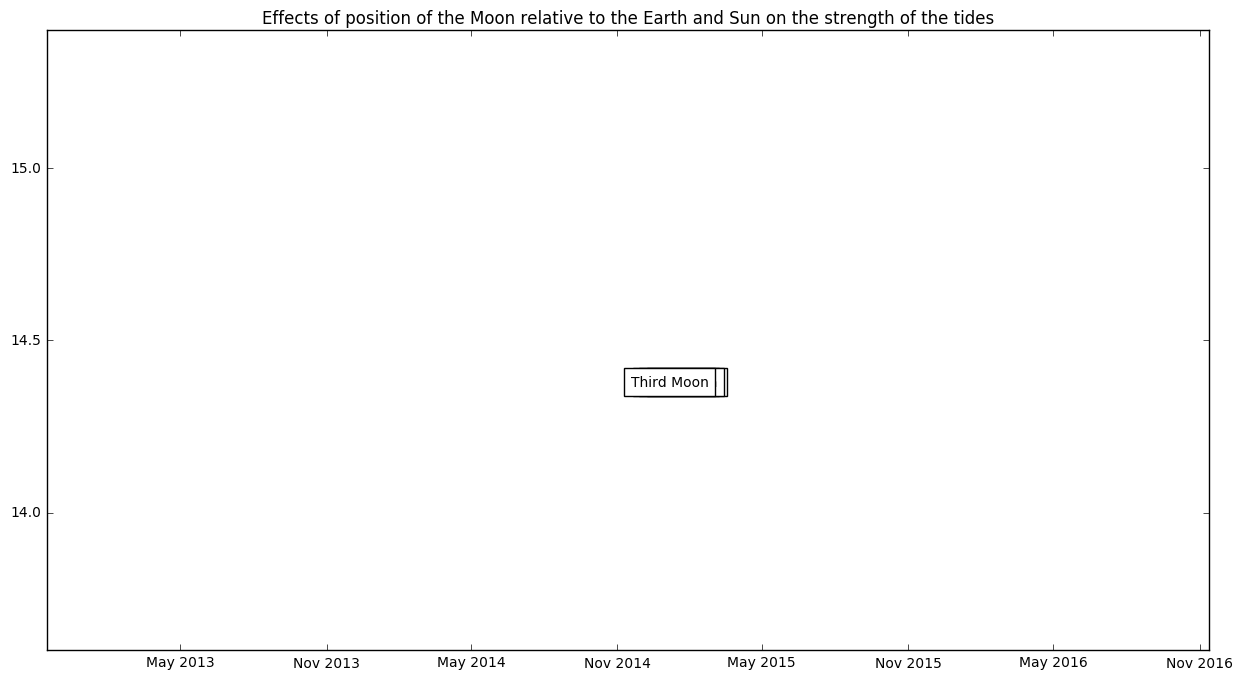

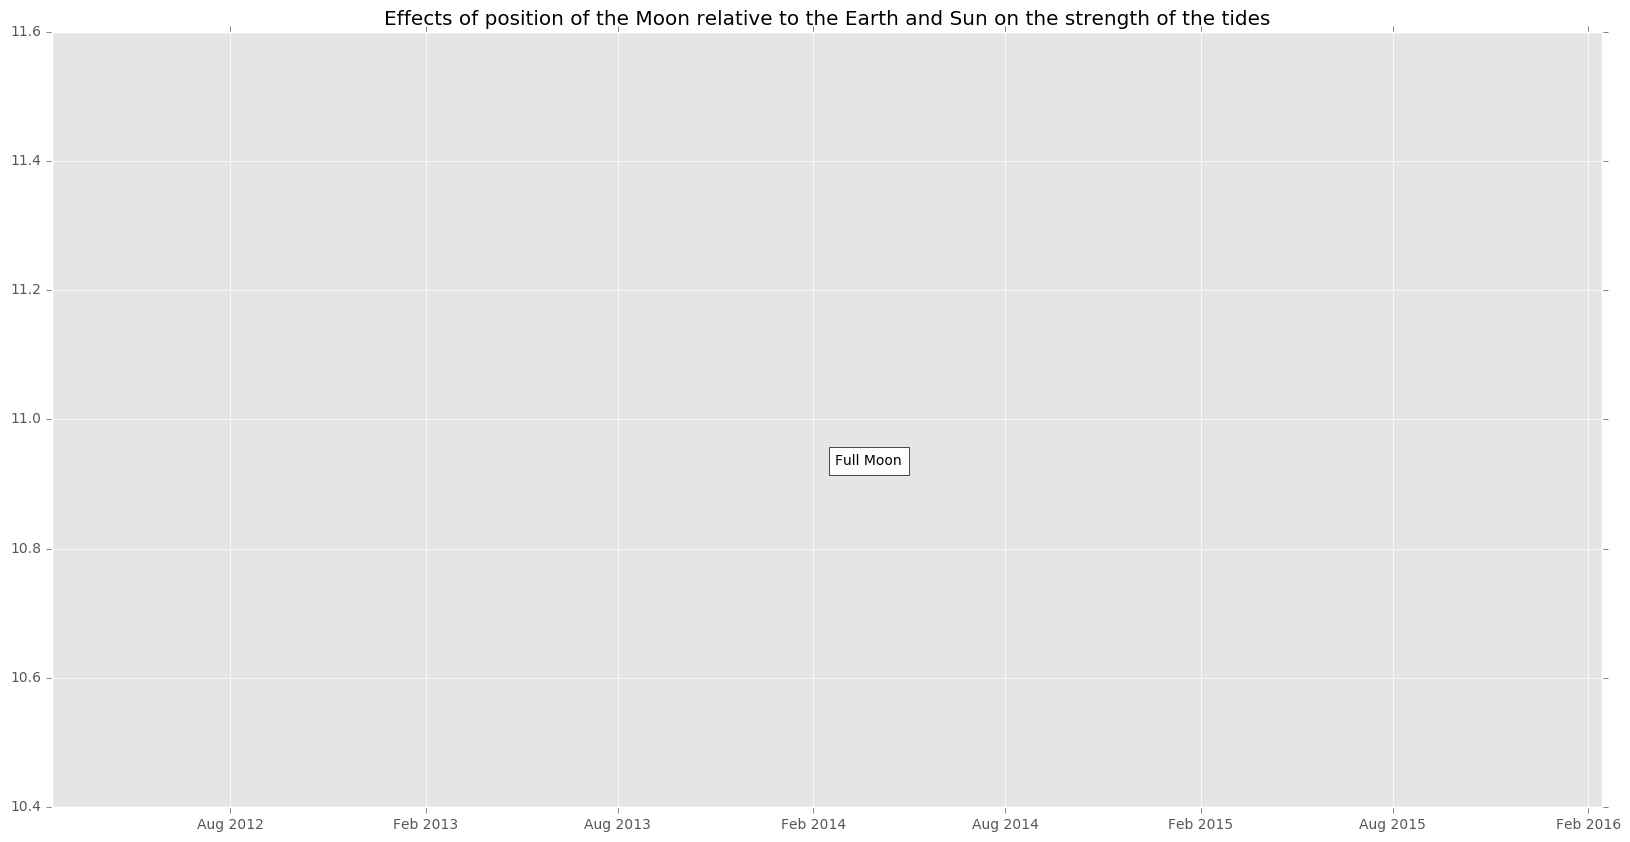

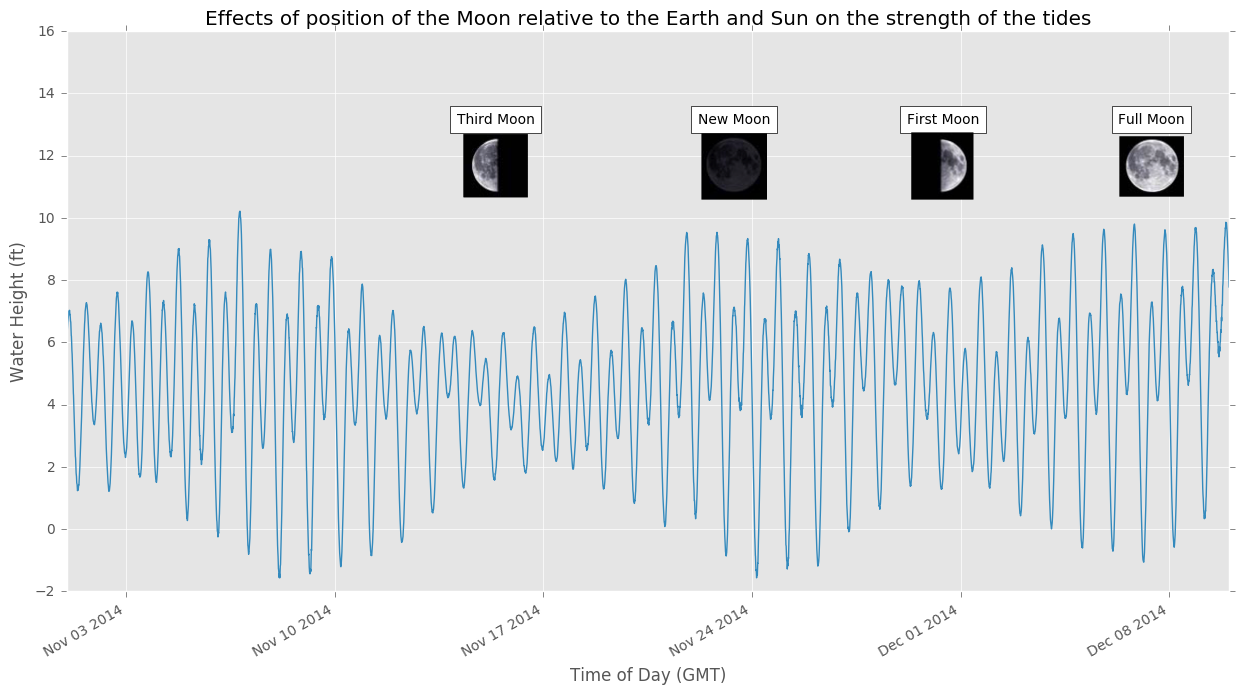

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))
# Add Text New
offsetbox = TextArea("New Moon", minimumdescent=False)
xyTextNew = [New_2014_dates[11], 14.5]
abTextNew = AnnotationBbox(offsetbox, xyTextNew,
    xybox=(30., -30.),
    xycoords='data',
    boxcoords="offset points")
ax.add_artist(abTextNew)
# add New moon image
NewMoon = plt.imread("./Figures/NewMoonA.png")
imageboxNew = OffsetImage(NewMoon, zoom=.5)
xyMoonNew = [New_2014_dates[11], 13]               # coordinates to position this image
abMoonNew = AnnotationBbox(imageboxNew, xyMoonNew,
    xybox=(30., -30.),
    xycoords='data',
    boxcoords="offset points",
    frameon=False)                                  
ax.add_artist(abMoonNew)
# Add Text Full
offsetboxFull = TextArea("Full Moon", minimumdescent=False)
xyTextFull = [Full_2014_dates[11], 14.5]
abTextFull = AnnotationBbox(offsetboxFull, xyTextFull,
    xybox=(30., -30.),
    xycoords='data',
    boxcoords="offset points")
ax.add_artist(abTextFull)
# add Full moon image
FullMoon = plt.imread("./Figures/FullMoonA.png")
imageboxFull = OffsetImage(FullMoon, zoom=.5)
xyMoonFull = [Full_2014_dates[11], 13]               # coordinates to position this image
abMoonFull = AnnotationBbox(imageboxFull, xyMoonFull,
    xybox=(30., -30.),
    xycoords='data',
    boxcoords="offset points",
    frameon=False)                                  
ax.add_artist(abMoonFull)
# Add Text First
offsetboxFirst = TextArea("First Moon", minimumdescent=False)
xyTextFirst = [First_2014_dates[11], 14.5]
abTextFirst = AnnotationBbox(offsetboxFirst, xyTextFirst,
    xybox=(30., -30.),
    xycoords='data',
    boxcoords="offset points")
ax.add_artist(abTextFirst)
# add First moon image
FirstMoon = plt.imread("./Figures/FirstQuarterA.png")
imageboxFirst = OffsetImage(FirstMoon, zoom=.5)
xyMoonFirst = [First_2014_dates[11], 13]               # coordinates to position this image
abMoonFirst = AnnotationBbox(imageboxFirst, xyMoonFirst,
    xybox=(30., -30.),
    xycoords='data',
    boxcoords="offset points",
    frameon=False)                                  
ax.add_artist(abMoonFirst)
# Add Text Third
offsetboxThird = TextArea("Third Moon", minimumdescent=False)
xyTextThird = [Third_2014_dates[10], 14.5]
abTextThird = AnnotationBbox(offsetboxThird, xyTextThird,
    xybox=(30., -30.),
    xycoords='data',
    boxcoords="offset points")
ax.add_artist(abTextThird)
# add Third moon image
ThirdMoon = plt.imread("./Figures/ThreeQuarterMoonA.png")
imageboxThird= OffsetImage(ThirdMoon, zoom=.5)
xyMoonThird = [Third_2014_dates[10], 13]               # coordinates to position this image
abMoonThird = AnnotationBbox(imageboxThird, xyMoonThird,
    xybox=(30., -30.),
    xycoords='data',
    boxcoords="offset points",
    frameon=False)                                  
ax.add_artist(abMoonThird)
plt.title('Effects of position of the Moon relative to the Earth and Sun on the strength of the tides')
plt.style.use('ggplot')
#Expand graph height
plt.plot(Third_2014_dates[10],14.5)
plt.plot(subset["Date Time"], subset["Water Level"])
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel("Time of Day (GMT)")
plt.ylabel("Water Height (ft)")
plt.draw()
plt.show()

## Spring and Neap Tides

### Spring Tides

A Spring tide occurs when the Sun, Earth, and Moon are in a line, as in a New Moon or Full Moon.  This causes the tidal bulges from the Sun and Moon to align and results in a higher high tide and a lower low tide.

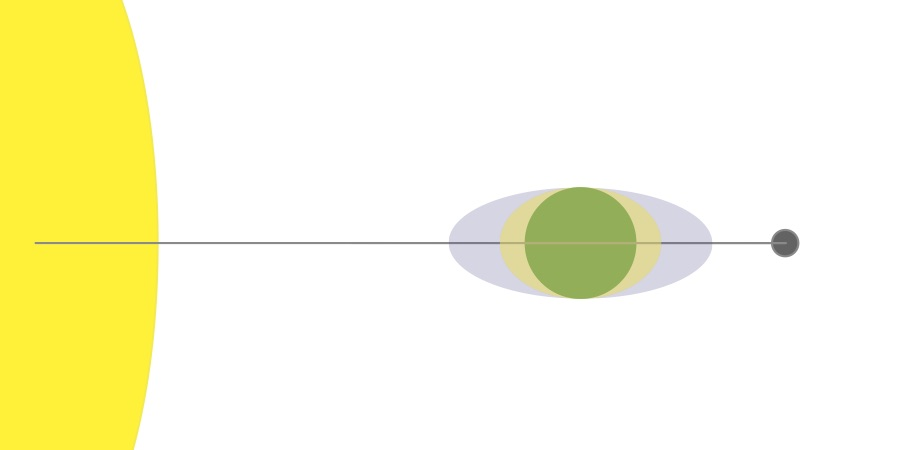

In [28]:
Image("./Figures/SunMoon_Full.jpg")

In [29]:
# Full Moon list
mcd.Full_2014

['20140115',
 '20140214',
 '20140316',
 '20140415',
 '20140514',
 '20140612',
 '20140712',
 '20140810',
 '20140908',
 '20141008',
 '20141106',
 '20141206']

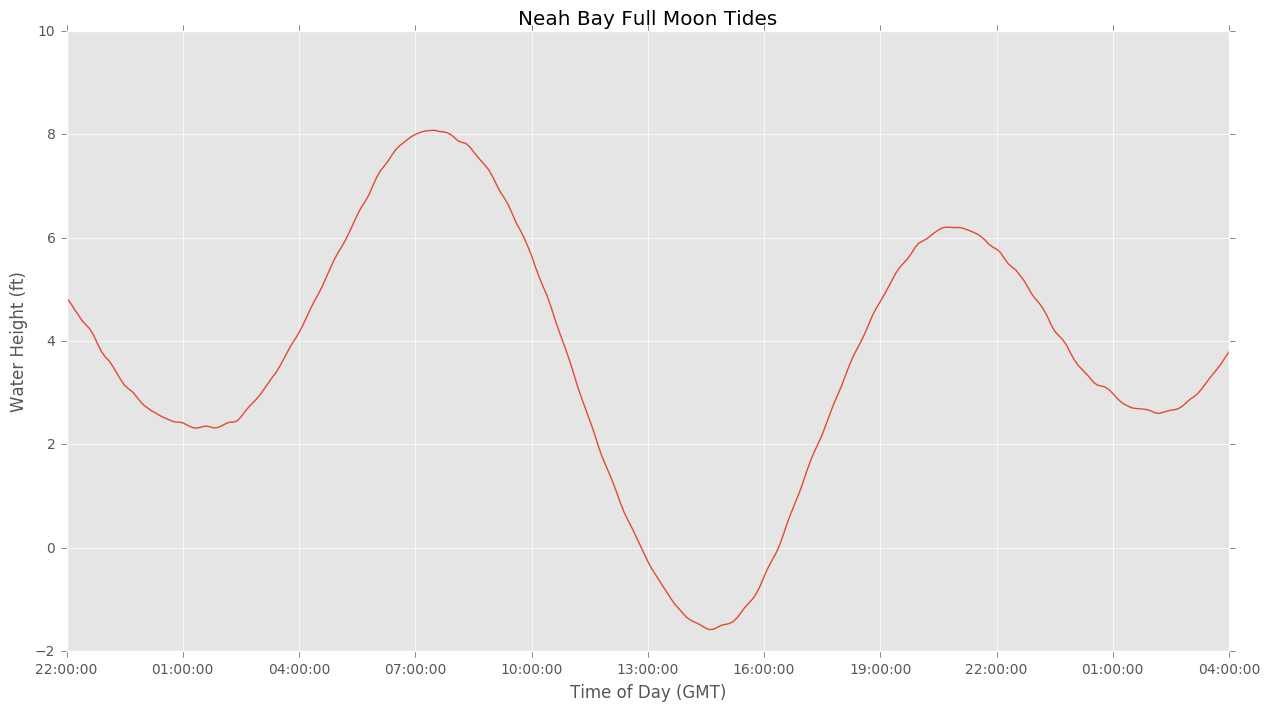

In [30]:
module1_utils.tidal_plot(NB, "2014-05-13 22:00:00", "2014-05-15 04:00:00",
                         title="Neah Bay Full Moon Tides", sized=(15,8))

The high tide here is at 8ft and the low tide is at almost -2ft. That is a tidal range of 10 ft!

Let's plot a few more Full Moon days and compare the ranges.

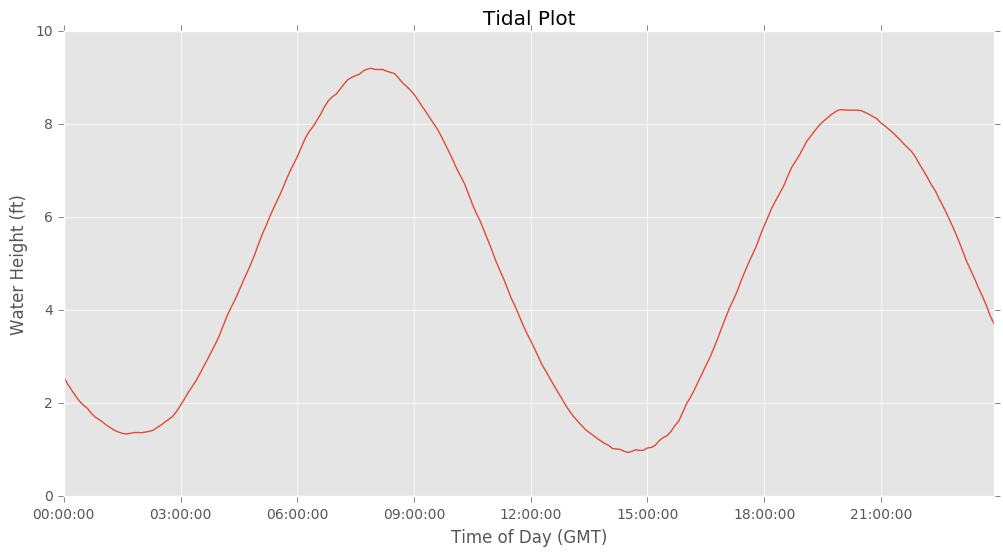

In [31]:
interact(module1_utils.moon_cycle_exploration, data=fixed(NB_2014), cycle_days=mcd.New_2014)

In [ ]:
def tidal_plot_all3(data1, data2, data3, start_time, end_time, title="Tidal Elevation",
               sized=(12,6)):
    """
    This function takes in a dataframe object, a start and end time, and a time
    index.  It generates a plot from start to end of tidal elevation from data.
    There is a vertical marker at the location specified in time_index.

    Parameters:
    ------------------
    data - pandas DataFrame object
        A dataframe containing the tidal elevation data

    start_time - string
        A string of the format "yyyy-mm-dd hh:mm:ss" in six minute intervals
        on the minute  (e.g. "2014-03-15 12:36:00")

    end_time - string
        A string of the format "yyyy-mm-dd hh:mm:ss" in six minute intervals
        on the minute (e.g. "2014-03-16 12:48:00")

    title - string
        A string to be the title of the generated plot

    sized - touple
        A touple to be the size of the generated figure (width, height)


    OUTPUT
    ------------------
    This function returns a matplotlib plot with tidal elevations from all three ports
    start_time to end_time with a vertical marker at the specified time_index
    """

    subset1 = module1_utils.trim_data(data1, start_time, end_time)
    subset2 = module1_utils.trim_data(data2, start_time, end_time)
    subset3 = module1_utils.trim_data(data3, start_time, end_time)
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.style.use("ggplot")
    plt.plot(subset1["Date Time"], subset1["Water Level"], label = 'Neah Bay')
    plt.plot(subset2["Date Time"], subset2["Water Level"], label = 'Port Townsend')
    plt.plot(subset3["Date Time"], subset3["Water Level"], label = 'Port Angeles')
    plt.xlabel("Time of Day (GMT)")
    plt.ylabel("Water Height (ft)")
    plt.title(title)
    ax.legend()
    plt.show()


In [12]:
#  You don't need to re import each function in every cell they are used.
# As long as you run the import cell at the beginning.

from tydal.module1_utils import trim_data
NB02132014 = trim_data(NB, "2014-02-13 22:00:00", "2014-02-15 04:00:00")
PT02132014 = trim_data(PT, "2014-02-13 22:00:00", "2014-02-15 04:00:00")
PA02132014 = trim_data(PA, "2014-02-13 22:00:00", "2014-02-15 04:00:00")

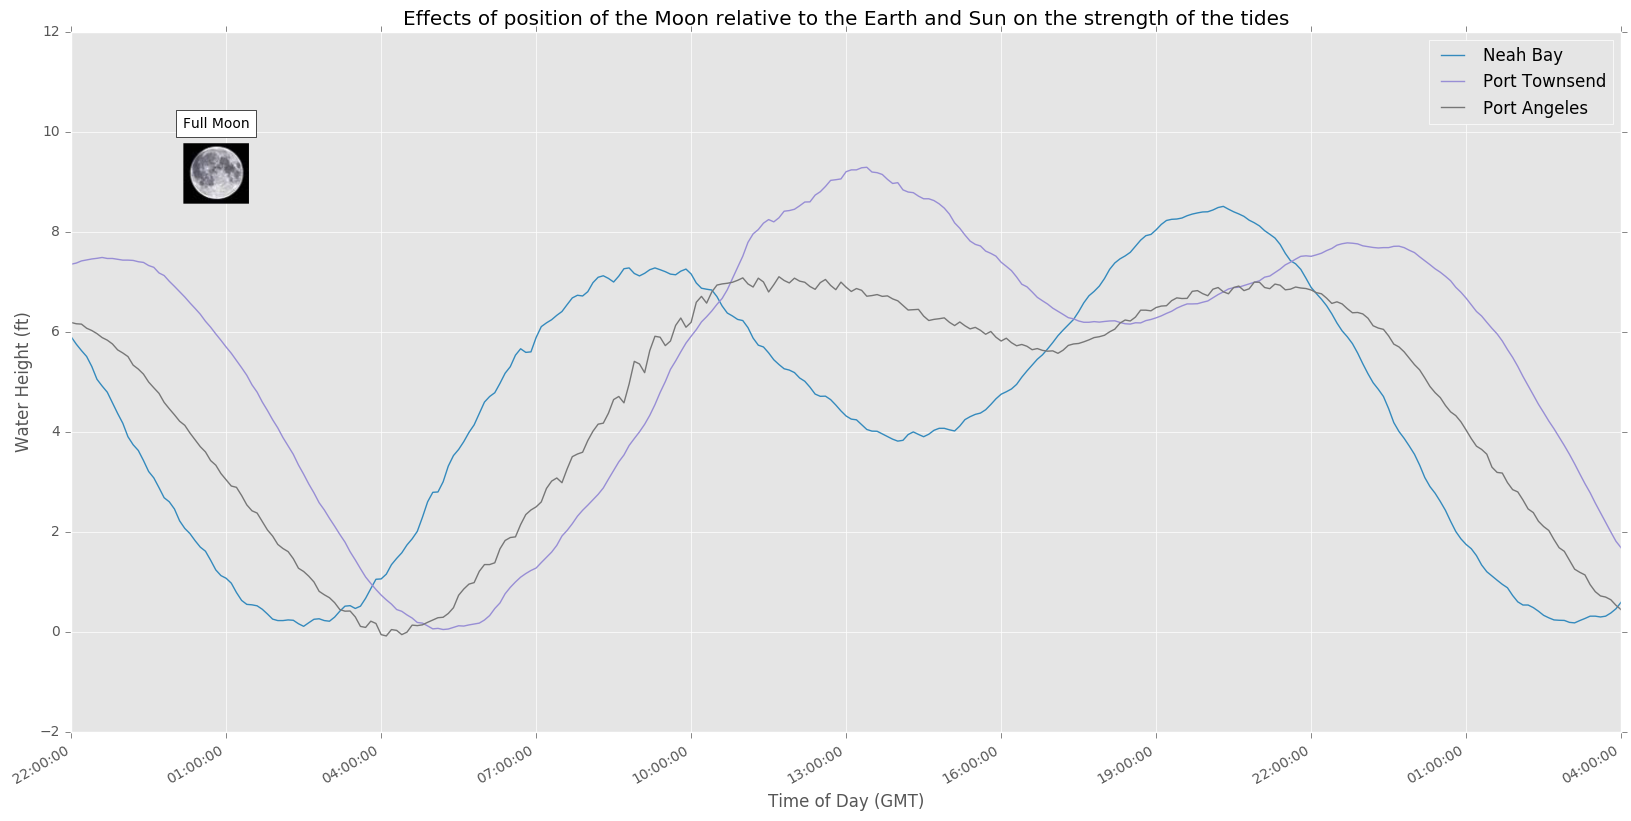

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
# Add Text Full
offsetboxFull = TextArea("Full Moon", minimumdescent=False)
xyTextFull = [Full_2014_dates[1], 11]
abTextFull = AnnotationBbox(offsetboxFull, xyTextFull,
    xybox=(30., -30.),
    xycoords='data',
    boxcoords="offset points")
ax.add_artist(abTextFull)
# add Full moon image
FullMoon = plt.imread("./Figures/FullMoonA.png")
imageboxFull = OffsetImage(FullMoon, zoom=.5)
xyMoonFull = [Full_2014_dates[1], 10]               # coordinates to position this image
abMoonFull = AnnotationBbox(imageboxFull, xyMoonFull,
    xybox=(30., -30.),
    xycoords='data',
    boxcoords="offset points",
    frameon=False)                                  
ax.add_artist(abMoonFull)
#Expand graph height
plt.plot(Full_2014_dates[1],11)
plt.title('Effects of position of the Moon relative to the Earth and Sun on the strength of the tides')
plt.style.use('ggplot')
plt.plot(NB02132014["Date Time"], NB02132014["Water Level"], label = 'Neah Bay')
plt.plot(PT02132014["Date Time"], PT02132014["Water Level"], label = 'Port Townsend')
plt.plot(PA02132014["Date Time"], PA02132014["Water Level"], label = 'Port Angeles')
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel("Time of Day (GMT)")
plt.ylabel("Water Height (ft)")
ax.legend()
plt.draw()
plt.show()

In [ ]:
# We can also compare with New Moon tides, which are also Spring Tides.
from tydal.module1_utils import trim_data
NB09212014 = trim_data(NB, "2014-09-21 22:00:00", "2014-09-24 04:00:00")
PT09212014 = trim_data(PT, "2014-09-21 22:00:00", "2014-09-24 04:00:00")
PA09212014 = trim_data(PA, "2014-09-21 22:00:00", "2014-09-24 04:00:00")

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
# Add Text New
offsetboxNew = TextArea("New Moon", minimumdescent=False)
xyTextNew = [New_2014_dates[9], 11]
abTextNew = AnnotationBbox(offsetboxNew, xyTextNew,
    xybox=(30., -30.),
    xycoords='data',
    boxcoords="offset points")
ax.add_artist(abTextNew)
# add New moon image
NewMoon = plt.imread("./Figures/NewMoonA.png")
imageboxNew = OffsetImage(NewMoon, zoom=.5)
xyMoonNew = [New_2014_dates[9], 10]               # coordinates to position this image
abMoonNew = AnnotationBbox(imageboxNew, xyMoonNew,
    xybox=(30., -30.),
    xycoords='data',
    boxcoords="offset points",
    frameon=False)                                  
ax.add_artist(abMoonNew)
#Expand graph height
plt.plot(New_2014_dates[9],11)
plt.title('Effects of position of the Moon relative to the Earth and Sun on the strength of the tides')
plt.style.use('ggplot')
plt.plot(NB09212014["Date Time"], NB09212014["Water Level"], label = 'Neah Bay')
plt.plot(PT09212014["Date Time"], PT09212014["Water Level"], label = 'Port Townsend')
plt.plot(PA09212014["Date Time"], PA09212014["Water Level"], label = 'Port Angeles')
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel("Time of Day (GMT)")
plt.ylabel("Water Height (ft)")
ax.legend()
plt.draw()
plt.show()

### Neap Tides

A Neap Tide occurs when the Moon is perpendicular to the line through the center of the Earth and Sun.  This occurs during First and Third Quarters.  This causes the tidal bulges to counter each other and results in a lower high tide and a higher low tide.

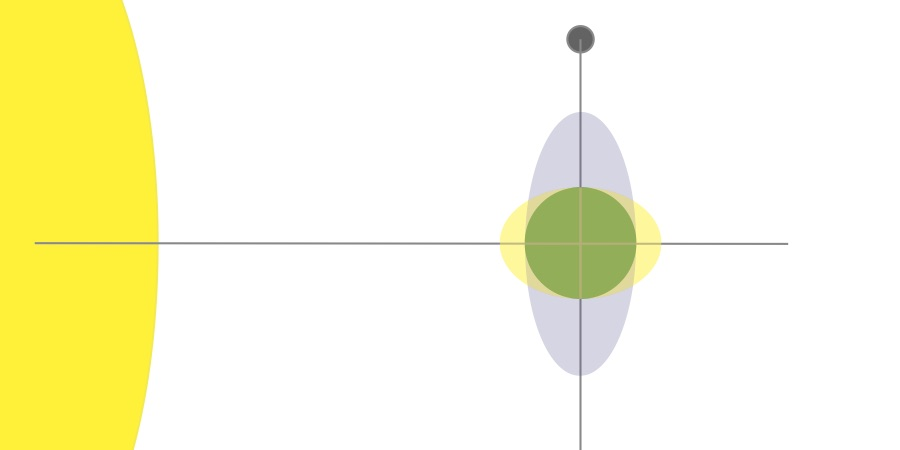

In [32]:
Image("./Figures/SunMoon_Third.jpg")

In [33]:
mcd.Third_2014

['20140123',
 '20140222',
 '20140323',
 '20140422',
 '20140521',
 '20140619',
 '20140718',
 '20140817',
 '20140915',
 '20141015',
 '20141114',
 '20141214']

We can explore the Third Quarter cycles as we did for the Full and New Moon dates.

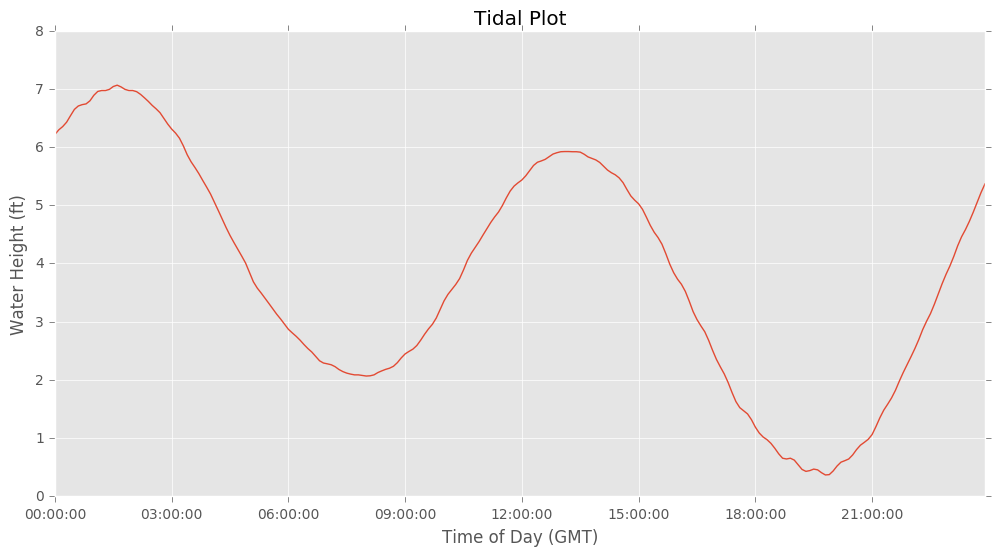

In [34]:
interact(module1_utils.moon_cycle_exploration, data=fixed(NB_2014), cycle_days=mcd.Third_2014)

Neap tides also occur during the First Quarter Phase.  Explore these dates below.

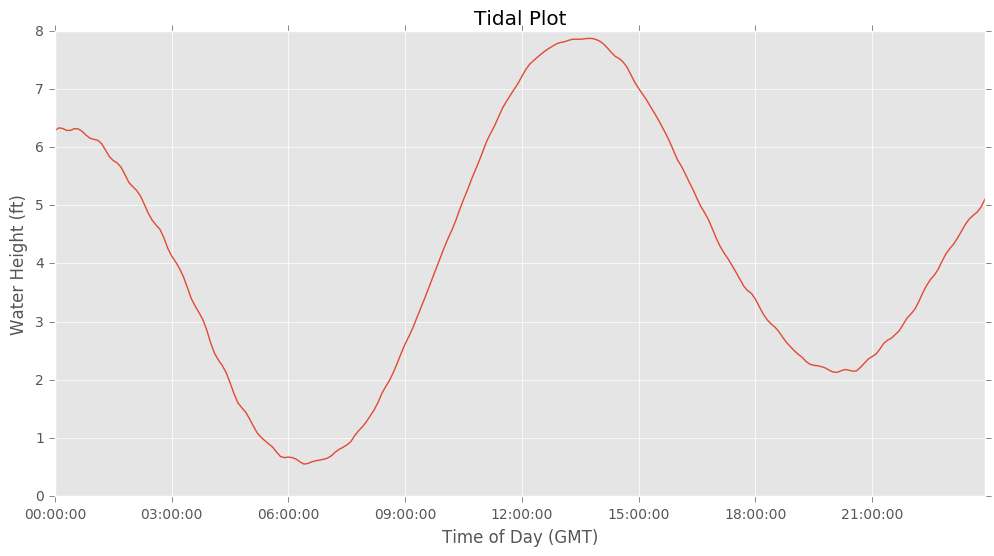

<function tydal.module1_utils.moon_cycle_exploration>

In [36]:
interact(module1_utils.moon_cycle_exploration, data=fixed(NB_2014), cycle_days=mcd.First_2014)

In [ ]:
# We can also compare with First tides, which are also Neap Tides.
from tydal.module1_utils import trim_data
NB05042014 = trim_data(NB, "2014-05-04 22:00:00", "2014-05-08 04:00:00")
PT05042014 = trim_data(PT, "2014-05-04 22:00:00", "2014-05-08 04:00:00")
PA05042014 = trim_data(PA, "2014-05-04 22:00:00", "2014-05-08 04:00:00")

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
# Add Text First
offsetboxFirst = TextArea("First Moon", minimumdescent=False)
xyTextFirst = [First_2014_dates[4], 11]
abTextFirst = AnnotationBbox(offsetboxFirst, xyTextFirst,
    xybox=(30., -30.),
    xycoords='data',
    boxcoords="offset points")
ax.add_artist(abTextFirst)
# add First moon image
FirstMoon = plt.imread("./Figures/FirstQuarterA.png")
imageboxFirst = OffsetImage(FirstMoon, zoom=.5)
xyMoonFirst = [First_2014_dates[4], 10]               # coordinates to position this image
abMoonFirst = AnnotationBbox(imageboxFirst, xyMoonFirst,
    xybox=(30., -30.),
    xycoords='data',
    boxcoords="offset points",
    frameon=False)                                  
ax.add_artist(abMoonFirst)
#Expand graph height
plt.plot(First_2014_dates[4],11)
plt.title('Effects of position of the Moon relative to the Earth and Sun on the strength of the tides')
plt.style.use('ggplot')
plt.plot(NB05042014["Date Time"], NB05042014["Water Level"], label = 'Neah Bay')
plt.plot(PT05042014["Date Time"], PT05042014["Water Level"], label = 'Port Townsend')
plt.plot(PA05042014["Date Time"], PA05042014["Water Level"], label = 'Port Angeles')
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel("Time of Day (GMT)")
plt.ylabel("Water Height (ft)")
ax.legend()
plt.draw()
plt.show()

In [ ]:
# We can also compare with Third tides, which are also Neap Tides.
from tydal.module1_utils import trim_data
NB07162014 = trim_data(NB, "2014-07-16 22:00:00", "2014-07-20 04:00:00")
PT07162014 = trim_data(PT, "2014-07-16 22:00:00", "2014-07-20 04:00:00")
PA07162014 = trim_data(PA, "2014-07-16 22:00:00", "2014-07-20 04:00:00")

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
# Add Text Third
offsetboxThird = TextArea("Third Moon", minimumdescent=False)
xyTextThird = [Third_2014_dates[6], 11.75]
abTextThird = AnnotationBbox(offsetboxThird, xyTextThird,
    xybox=(30., -30.),
    xycoords='data',
    boxcoords="offset points")
ax.add_artist(abTextThird)
# add Third moon image
ThirdMoon = plt.imread("./Figures/ThreeQuarterMoonA.png")
imageboxThird= OffsetImage(ThirdMoon, zoom=.5)
xyMoonThird = [Third_2014_dates[6], 10.75]               # coordinates to position this image
abMoonThird = AnnotationBbox(imageboxThird, xyMoonThird,
    xybox=(30., -30.),
    xycoords='data',
    boxcoords="offset points",
    frameon=False)                                  
ax.add_artist(abMoonThird)
#Expand graph height
plt.plot(Third_2014_dates[6],12)
plt.title('Effects of position of the Moon relative to the Earth and Sun on the strength of the tides')
plt.style.use('ggplot')
plt.plot(NB07162014["Date Time"], NB07162014["Water Level"], label = 'Neah Bay')
plt.plot(PT07162014["Date Time"], PT07162014["Water Level"], label = 'Port Townsend')
plt.plot(PA07162014["Date Time"], PA07162014["Water Level"], label = 'Port Angeles')
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel("Time of Day (GMT)")
plt.ylabel("Water Height (ft)")
ax.legend()
plt.draw()
plt.show()

# Tide changes over different ports in same area

Using the tide data from Neah Bay, Port Townsend, and Port Angeles we can see how the tides vary between stationsf ro each moon phase.  We will start with a New Moon.

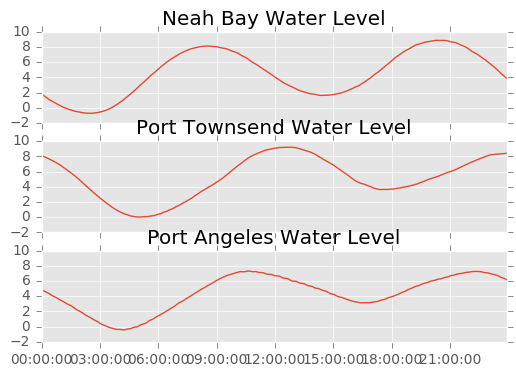

In [35]:
%matplotlib inline

interact(module1_utils.multistation_moon, data=fixed([NB_2014, PT_2014, PA_2014]), cycle_days=mcd.New_2014)

We can also explore the First Quarter Moon

<function tydal.module1_utils.multistation_moon>

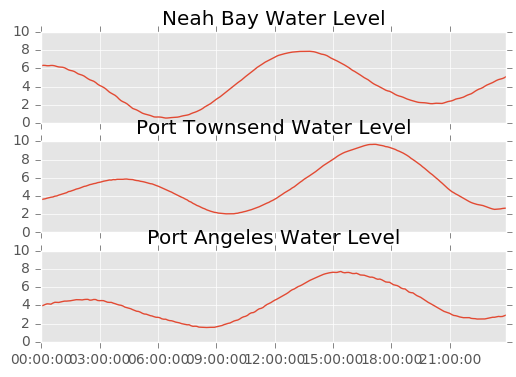

In [38]:
interact(module1_utils.multistation_moon, data=fixed([NB_2014, PT_2014, PA_2014]), cycle_days=mcd.First_2014)

The Full Moon...

<function tydal.module1_utils.multistation_moon>

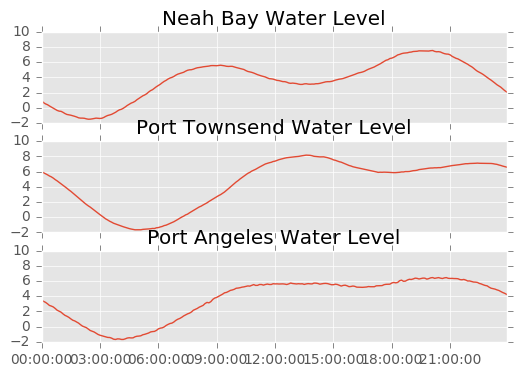

In [39]:
interact(module1_utils.multistation_moon, data=fixed([NB_2014, PT_2014, PA_2014]), cycle_days=mcd.Full_2014)

And Third Quarter...

<function tydal.module1_utils.multistation_moon>

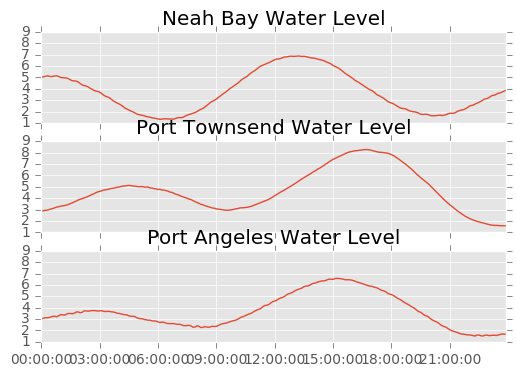

In [40]:
interact(module1_utils.multistation_moon, data=fixed([NB_2014, PT_2014, PA_2014]), cycle_days=mcd.Third_2014)

In [ ]:
# We can also compare with Third tides, which are also Neap Tides.
from tydal.module1_utils import trim_data
NB06012014 = trim_data(NB, "2014-06-01 00:00:00", "2014-06-02 00:00:00")
PT06012014 = trim_data(PT, "2014-06-01 00:00:00", "2014-06-02 00:00:00")
PA06012014 = trim_data(PA, "2014-06-01 00:00:00", "2014-06-02 00:00:00")
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(PT06012014['Date Time'], PT06012014['Water Level'],label='Port Townsend')
plt.plot(PA06012014['Date Time'], PA06012014['Water Level'],label='Port Angeles')
plt.plot(NB06012014['Date Time'], NB06012014['Water Level'],label='Neah Bay')
plt.xlabel("Time (Hours)")
plt.ylabel("Water Depth based on MLLW")
plt.legend()
ax.set_title("Water Level by Time showing High and Low Tide")
plt.show()



In [ ]:

#Label first high and Low
#Image moon earth

Notice in the figure above that each station (in same geographical area=Washington State) the water level chnages between the three. This is due to the ebb and flow of the tides into the sound. Notice the steep positive slopes to flat to steep negative slope and back.

In [ ]:
Image("./Figures/MapOfStations.jpg")

In [ ]:
#Full month of data? New to New Moon?

Then we should pull in all three stations and (still working out exactly how I want to show this) show how the water level compares between the three across a day. (This is to show the ebb and flow of the tides into the sound, steep positive slope to flat to steep negative slope and back).

We may want to pick a full month of data to plot to show how the range of the tides changes throughout the month (from new moon to new moon).

# # Module 1 Quiz

In [40]:
def quiz():
    print("Module 1 Quiz (5 questions)")
    print()
    print("Question 1: Why is the Earth affected by the Moon?")
    print()
    print("a. Massive")
    print("b. Close/Proximity")
    print("c. It isn't")
    answer = input("Make your choice: ")
    if answer == "b":
        print("Correct!")
    else:
        print("Incorrect")
    print("Question 2: How many high and low tides are there in a day?")
    print()
    print("a. 2 high, 1 low")
    print("b. 1 high, 1 low")
    print("c. 2 high, 2 low")
    answer = input("Make your choice: ")
    if answer == "c":
        print("Correct!")
    else:
        print("Incorrect")  
    print("Question 2: How many high and low tides are there in a day for a semidurinal tideal day?")
    print()
    print("a. 2 high, 1 low")
    print("b. 1 high, 1 low")
    print("c. 2 high, 2 low")
    answer = input("Make your choice: ")
    if answer == "c":
        print("Correct!")
    else:
        print("Incorrect") 
    print("Question 3: The tidal period is of of 24 hours by __ due to the Earth's roation about it's axis?")
    print()
    print("a. None")
    print("b. 50 minutes")
    print("c. 1 hour")
    answer = input("Make your choice: ")
    if answer == "b":
        print("Correct!")
    else:
        print("Incorrect") 
    print("Question 4: Spring tide causes tidal bulges to be ___ high tide and ___ low tide?")
    print()
    print("a. higher, lower")
    print("b. higher, higher")
    print("c. lower, higher")
    answer = input("Make your choice: ")
    if answer == "a":
        print("Correct!")
    else:
        print("Incorrect") 
    print("Question 5: Neap tide (First and Third Quarter moon) causes tidal bulges to be ___ high tide and ___ low tide?")
    print()
    print("a. higher, lower")
    print("b. higher, higher")
    print("c. lower, higher")
    answer = input("Make your choice: ")
    if answer == "c":
        print("Correct!")
    else:
        print("Incorrect") 
    print("Go to Module 2")

In [41]:
quiz()

Module 1 Quiz (5 questions)

Question 1: Why is the Earth affected by the Moon?

a. Massive
b. Close/Proximity
c. It isn't
Make your choice: c
Incorrect
Question 2: How many high and low tides are there in a day?

a. 2 high, 1 low
b. 1 high, 1 low
c. 2 high, 2 low
Make your choice: d
Incorrect
Question 2: How many high and low tides are there in a day for a semidurinal tideal day?

a. 2 high, 1 low
b. 1 high, 1 low
c. 2 high, 2 low
Make your choice: d
Incorrect
Question 3: The tidal period is of of 24 hours by __ due to the Earth's roation about it's axis?

a. None
b. 50 minutes
c. 1 hour
Make your choice: d
Incorrect
Question 4: Spring tide causes tidal bulges to be ___ high tide and ___ low tide?

a. higher, lower
b. higher, higher
c. lower, higher
Make your choice: d
Incorrect
Question 5: Neap tide (First and Third Quarter moon) causes tidal bulges to be ___ high tide and ___ low tide?

a. higher, lower
b. higher, higher
c. lower, higher
Make your choice: d
Incorrect
Go to Module 2
